In [4]:
!pip install torch torchvision

In [5]:
!pip install -U d2l

In [7]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


## Initializing Model Parameters

In [8]:
# PyTorch does not implicitly reshape the inputs. Thus we define the flatten
# layer to reshape the inputs before the linear layer in our network
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

## Softmax Implementation Revisited

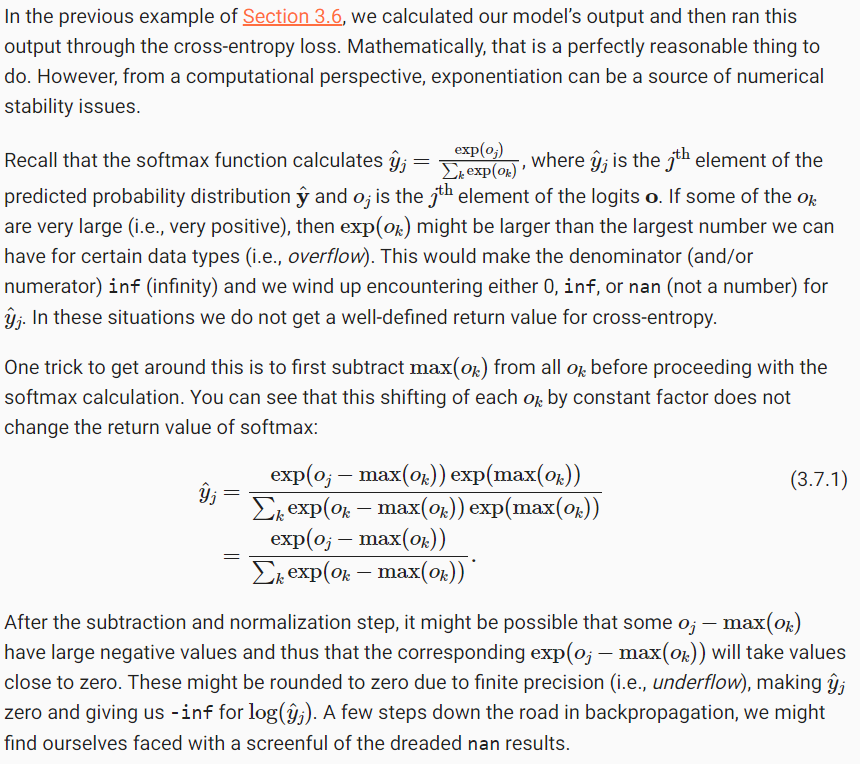
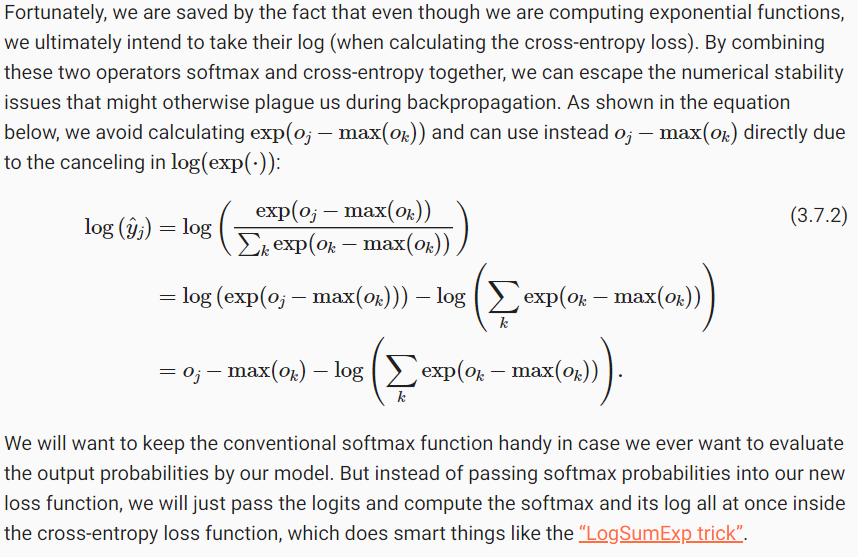

In [9]:
loss = nn.CrossEntropyLoss(reduction='none')

## Optimization Algorithm

Here, we use minibatch stochastic gradient descent with a learning rate of 0.1 as the optimization algorithm. Note that this is the same as we applied in the linear regression example and it illustrates the general applicability of the optimizers.

In [10]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

## Training

In [ ]:
# we call the training function defined in Section 3.6 to train the model

num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

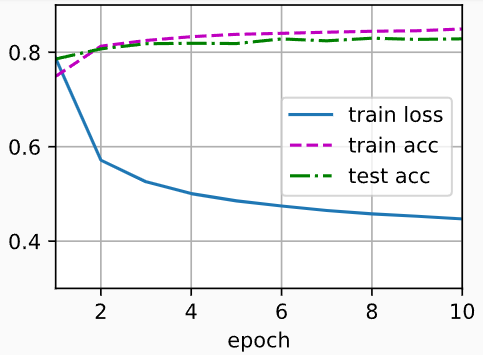

As before, this algorithm converges to a solution that achieves a decent accuracy, albeit this time with fewer lines of code than before.

## Summary



*   Using high-level APIs, we can implement softmax regression much more concisely.


*   From a computational perspective, implementing softmax regression has intricacies. Note that in many cases, a deep learning framework takes additional precautions beyond these most well-known tricks to ensure numerical stability, saving us from even more pitfalls that we would encounter if we tried to code all of our models from scratch in practice.

